In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [2]:
# Read CSV file and print head
train_ds = pd.read_csv("data/Tabular Playground Series - Feb 2021/train.csv")
train_ds.drop(["id"], axis=1, inplace=True)
train_ds.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
# Get table info
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [4]:
# Get count of data by column
train_ds.count()

cat0      300000
cat1      300000
cat2      300000
cat3      300000
cat4      300000
cat5      300000
cat6      300000
cat7      300000
cat8      300000
cat9      300000
cont0     300000
cont1     300000
cont2     300000
cont3     300000
cont4     300000
cont5     300000
cont6     300000
cont7     300000
cont8     300000
cont9     300000
cont10    300000
cont11    300000
cont12    300000
cont13    300000
target    300000
dtype: int64

In [5]:
# Check for null values
train_ds.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
target    0
dtype: int64

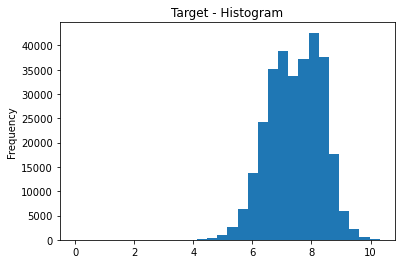

In [6]:
# View target histogram
train_ds["target"].plot(kind="hist", bins = 30)
plt.title('Target - Histogram')
plt.show()

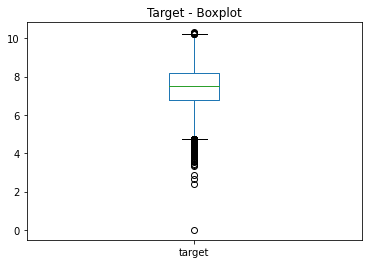

In [7]:
# Boxplot for data visualization
train_ds["target"].plot(kind="box")
plt.title("Target - Boxplot")
plt.show()

In [8]:
# Check for outliers
outliers = train_ds[(train_ds["target"] < 5) | (train_ds["target"] > 10)]
print(len(outliers))

884


In [9]:
# Remove outliers
train_ds = train_ds[(train_ds["target"] > 5) & (train_ds["target"] < 10)]
len(train_ds)

299116

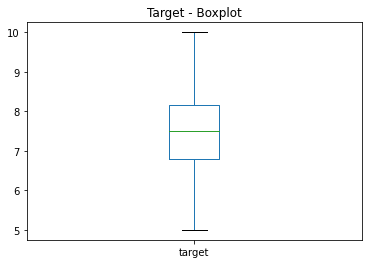

In [10]:
# Recheck outliers
train_ds["target"].plot(kind="box")
plt.title("Target - Boxplot")
plt.show()

In [11]:
train_ds.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [12]:
# Get all columns with float values. Exclude Strings to plot histogram.
feature_list_num = ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
                'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
                'cont13']
feature_list_num

['cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13']

Text(0.5, 0.98, 'Histograms of Numerical Features')

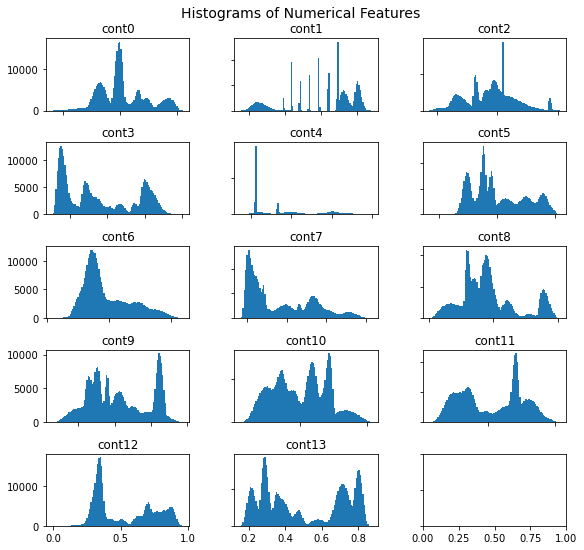

In [13]:
# Histogram for each numeric feature

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(8, 8) 
fig.tight_layout(rect=[0, 0.03, 1, 0.95]) 

axs[0, 0].hist(train_ds[feature_list_num[0]], bins=100) #First histogram at 0x0 
axs[0, 0].set_title(f'{feature_list_num[0]}') 

axs[0, 1].hist(train_ds[feature_list_num[1]], bins=100) #Second histogram at 0x1 
axs[0, 1].set_title(f'{feature_list_num[1]}')

axs[0, 2].hist(train_ds[feature_list_num[2]], bins=100)
axs[0, 2].set_title(f'{feature_list_num[2]}')
                    
axs[1, 0].hist(train_ds[feature_list_num[3]], bins=100)
axs[1, 0].set_title(f'{feature_list_num[3]}')
                    
axs[1, 1].hist(train_ds[feature_list_num[4]], bins=100)
axs[1, 1].set_title(f'{feature_list_num[4]}')

axs[1, 2].hist(train_ds[feature_list_num[5]], bins=100)
axs[1, 2].set_title(f'{feature_list_num[5]}')
                    
axs[2, 0].hist(train_ds[feature_list_num[6]], bins=100)
axs[2, 0].set_title(f'{feature_list_num[6]}')

axs[2, 1].hist(train_ds[feature_list_num[7]], bins=100)
axs[2, 1].set_title(f'{feature_list_num[7]}')

axs[2, 2].hist(train_ds[feature_list_num[8]], bins=100)
axs[2, 2].set_title(f'{feature_list_num[8]}')

axs[3, 0].hist(train_ds[feature_list_num[9]], bins=100)
axs[3, 0].set_title(f'{feature_list_num[9]}')                    
                    
axs[3, 1].hist(train_ds[feature_list_num[10]], bins=100)
axs[3, 1].set_title(f'{feature_list_num[10]}')                                        
                    
axs[3, 2].hist(train_ds[feature_list_num[11]], bins=100)
axs[3, 2].set_title(f'{feature_list_num[11]}')   
                    
axs[4, 0].hist(train_ds[feature_list_num[12]], bins=100)
axs[4, 0].set_title(f'{feature_list_num[12]}')
                    
axs[4, 1].hist(train_ds[feature_list_num[13]], bins=100)
axs[4, 1].set_title(f'{feature_list_num[13]}')
                    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
                    
plt.suptitle("Histograms of Numerical Features", size=14)                    

<ipython-input-14-89f36912accf>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


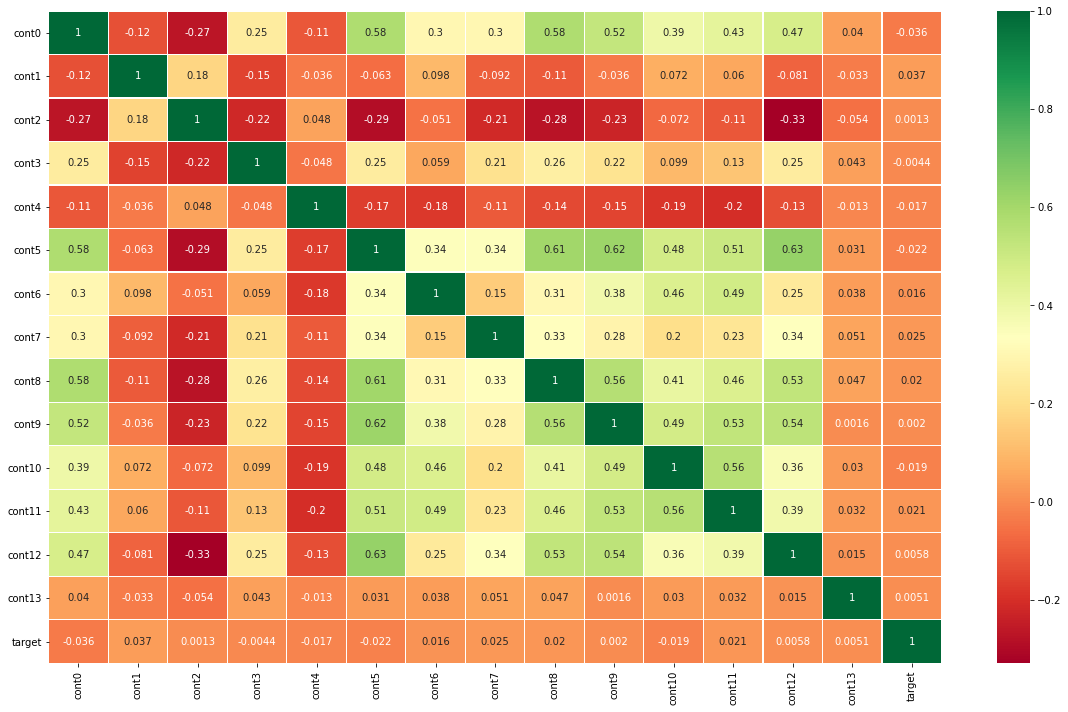

In [14]:
# Correlation Matrix
sns.heatmap(train_ds.corr(), annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.show()

In [15]:
feature_list_cat = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 
                'cat7', 'cat8', 'cat9']
feature_list_cat

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

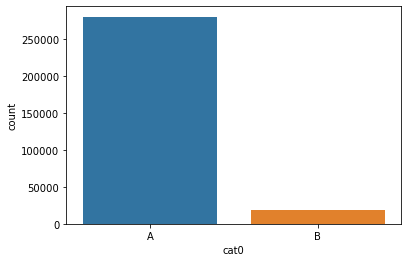

In [16]:
sns.countplot(data=train_ds, x=feature_list_cat[0])
plt.show()

[Text(81.0, 0.5, '')]

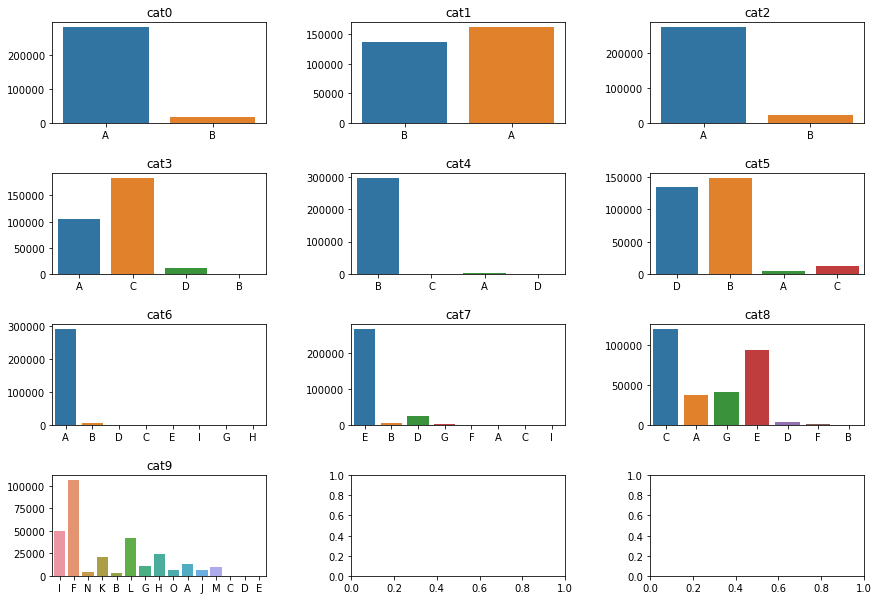

In [17]:
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.countplot(data=train_ds, x=feature_list_cat[0], ax=axs[0, 0])
axs[0, 0].title.set_text(feature_list_cat[0])
axs[0, 0].set(xlabel=None)
axs[0, 0].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[1], ax=axs[0, 1])
axs[0, 1].title.set_text(feature_list_cat[1])
axs[0, 1].set(xlabel=None)
axs[0, 1].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[2], ax=axs[0, 2])
axs[0, 2].title.set_text(feature_list_cat[2])
axs[0, 2].set(xlabel=None)
axs[0, 2].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[3], ax=axs[1, 0])
axs[1, 0].title.set_text(feature_list_cat[3])
axs[1, 0].set(xlabel=None)
axs[1, 0].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[4], ax=axs[1, 1])
axs[1, 1].title.set_text(feature_list_cat[4])
axs[1, 1].set(xlabel=None)
axs[1, 1].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[5], ax=axs[1, 2])
axs[1, 2].title.set_text(feature_list_cat[5])
axs[1, 2].set(xlabel=None)
axs[1, 2].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[6], ax=axs[2, 0])
axs[2, 0].title.set_text(feature_list_cat[6])
axs[2, 0].set(xlabel=None)
axs[2, 0].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[7], ax=axs[2, 1])
axs[2, 1].title.set_text(feature_list_cat[7])
axs[2, 1].set(xlabel=None)
axs[2, 1].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[8], ax=axs[2, 2])
axs[2, 2].title.set_text(feature_list_cat[8])
axs[2, 2].set(xlabel=None)
axs[2, 2].set(ylabel=None)

sns.countplot(data=train_ds, x=feature_list_cat[9], ax=axs[3, 0])
axs[3, 0].title.set_text(feature_list_cat[9])
axs[3, 0].set(xlabel=None)
axs[3, 0].set(ylabel=None)

In [18]:
# Label Encoding to Categorical Columns
# encoder = OrdinalEncoder()
# train_ds["cat0"] = encoder.fit_transform(train_ds["cat0"].to_numpy().reshape(-1, 1))
# train_ds["cat1"] = encoder.fit_transform(train_ds["cat1"].to_numpy().reshape(-1, 1))
# train_ds["cat2"] = encoder.fit_transform(train_ds["cat2"].to_numpy().reshape(-1, 1))
# train_ds["cat3"] = encoder.fit_transform(train_ds["cat3"].to_numpy().reshape(-1, 1))
# train_ds["cat4"] = encoder.fit_transform(train_ds["cat4"].to_numpy().reshape(-1, 1))
# train_ds["cat5"] = encoder.fit_transform(train_ds["cat5"].to_numpy().reshape(-1, 1))
# train_ds["cat6"] = encoder.fit_transform(train_ds["cat6"].to_numpy().reshape(-1, 1))
# train_ds["cat7"] = encoder.fit_transform(train_ds["cat7"].to_numpy().reshape(-1, 1))
# train_ds["cat8"] = encoder.fit_transform(train_ds["cat8"].to_numpy().reshape(-1, 1))
# train_ds["cat9"] = encoder.fit_transform(train_ds["cat9"].to_numpy().reshape(-1, 1))

In [19]:
train_ds.head(100)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A,B,A,C,B,B,A,E,E,F,...,0.198953,0.304955,0.228038,0.165184,0.350502,0.231549,0.265881,0.351718,0.251234,8.574307
96,A,B,A,D,B,B,A,E,C,H,...,0.390233,0.406308,0.254529,0.401283,0.443222,0.611084,0.373161,0.329228,0.289662,7.613036
97,A,B,A,C,B,D,A,E,E,B,...,0.435150,0.340275,0.260918,0.311286,0.611101,0.568261,0.397329,0.650514,0.805869,7.691082
98,A,B,A,C,C,D,A,E,G,F,...,0.679719,0.480595,0.484355,0.913394,0.840664,0.577120,0.346455,0.893273,0.671947,8.441794


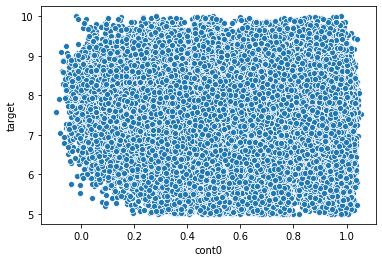

In [20]:
# Scatterplot Feature vs Target
sns.scatterplot(data=train_ds, x=feature_list_num[0], y="target")

[Text(0.5, 59.99999999999993, '')]

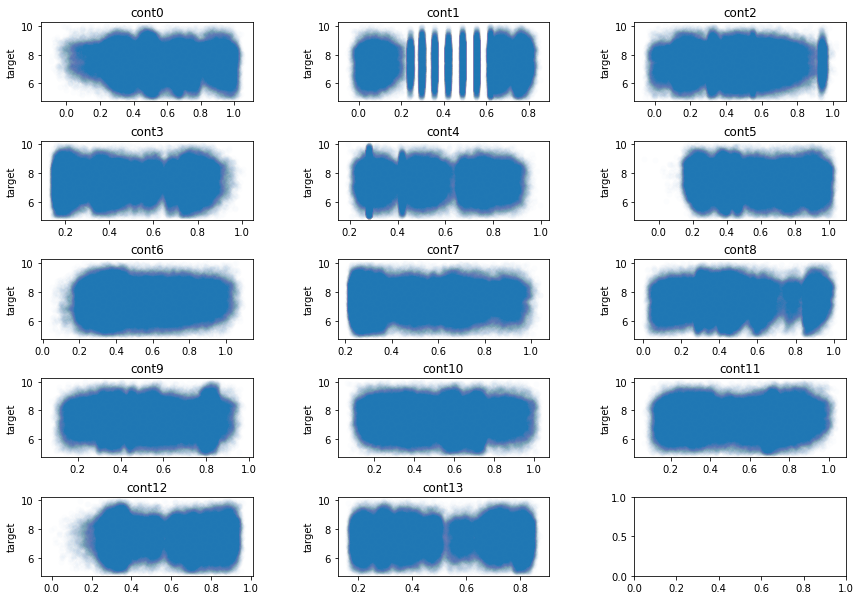

In [21]:
fig, axs = plt.subplots(5, 3)
fig.set_size_inches(12, 9)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(wspace=0.4, hspace=0.5)

sns.scatterplot(data=train_ds, x=feature_list_num[0], y="target", ax=axs[0, 0], alpha=0.01)
axs[0, 0].title.set_text(feature_list_num[0])
axs[0, 0].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[1], y="target", ax=axs[0, 1], alpha=0.01)
axs[0, 1].title.set_text(feature_list_num[1])
axs[0, 1].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[2], y="target", ax=axs[0, 2], alpha=0.01)
axs[0, 2].title.set_text(feature_list_num[2])
axs[0, 2].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[3], y="target", ax=axs[1, 0], alpha=0.01)
axs[1, 0].title.set_text(feature_list_num[3])
axs[1, 0].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[4], y="target", ax=axs[1, 1], alpha=0.01)
axs[1, 1].title.set_text(feature_list_num[4])
axs[1, 1].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[5], y="target", ax=axs[1, 2], alpha=0.01)
axs[1, 2].title.set_text(feature_list_num[5])
axs[1, 2].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[6], y="target", ax=axs[2, 0], alpha=0.01)
axs[2, 0].title.set_text(feature_list_num[6])
axs[2, 0].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[7], y="target", ax=axs[2, 1], alpha=0.01)
axs[2, 1].title.set_text(feature_list_num[7])
axs[2, 1].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[8], y="target", ax=axs[2, 2], alpha=0.01)
axs[2, 2].title.set_text(feature_list_num[8])
axs[2, 2].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[9], y="target", ax=axs[3, 0], alpha=0.01)
axs[3, 0].title.set_text(feature_list_num[9])
axs[3, 0].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[10], y="target", ax=axs[3, 1], alpha=0.01)
axs[3, 1].title.set_text(feature_list_num[10])
axs[3, 1].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[11], y="target", ax=axs[3, 2], alpha=0.01)
axs[3, 2].title.set_text(feature_list_num[11])
axs[3, 2].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[12], y="target", ax=axs[4, 0], alpha=0.01)
axs[4, 0].title.set_text(feature_list_num[12])
axs[4, 0].set(xlabel=None)

sns.scatterplot(data=train_ds, x=feature_list_num[13], y="target", ax=axs[4, 1], alpha=0.01)
axs[4, 1].title.set_text(feature_list_num[13])
axs[4, 1].set(xlabel=None)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
all_feature = train_ds.drop("target", axis=1)
target_feature = train_ds[["target"]]

In [24]:
all_feature.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,B,A,A,B,D,A,E,C,I,...,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,B,A,A,A,B,B,A,E,A,F,...,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,A,A,A,C,B,D,A,B,C,N,...,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,A,A,A,C,B,D,A,E,G,K,...,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,A,B,A,A,B,B,A,E,C,F,...,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743


In [25]:
type(all_feature)

pandas.core.frame.DataFrame

In [26]:
target_feature.head()

,target
0,6.994023
1,8.071256
2,5.760456
3,7.806457
4,6.868974


In [27]:
type(target_feature)

pandas.core.frame.DataFrame

In [28]:
x_train, x_test, y_train, y_test = train_test_split(all_feature, target_feature, test_size=0.3, random_state=42)

In [29]:
x_train.head(50)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
76001,A,A,A,A,B,D,A,D,G,F,...,0.284352,0.846430,0.203923,0.572915,0.610420,0.807292,0.179528,0.244508,0.853731,0.406445
59274,A,A,A,C,B,D,C,E,C,F,...,0.228534,0.823960,0.512585,0.582435,0.539213,0.643717,0.619663,0.561622,0.742514,0.321214
16718,A,A,A,A,B,B,A,E,C,F,...,0.816924,0.377799,0.363673,0.261884,0.419790,0.349865,0.699997,0.304342,0.232439,0.199322
287428,A,A,A,A,B,D,A,E,C,F,...,0.279671,0.696765,0.417500,0.554509,0.061227,0.329456,0.476800,0.310942,0.693706,0.797996
107533,B,A,A,C,B,D,A,E,A,A,...,0.278128,0.533385,0.227280,0.346207,0.861787,0.790118,0.527165,0.667629,0.848258,0.289638
237667,A,B,A,C,B,B,A,E,D,A,...,0.411949,0.236299,0.252447,0.287829,0.282730,0.292189,0.216148,0.150468,0.337826,0.432688
146332,A,B,A,C,B,B,A,E,C,I,...,0.279171,0.360898,0.376324,0.531712,0.449639,0.443358,0.526293,0.497278,0.280240,0.680299
222643,A,A,A,C,B,B,A,E,C,F,...,0.743753,0.476736,0.323519,0.256579,0.318459,0.397308,0.364651,0.231622,0.346496,0.230070
217097,A,A,A,C,B,B,A,D,A,F,...,0.279239,0.658487,0.917666,0.265584,0.492385,0.609976,0.754106,0.901358,0.289314,0.260002
226425,A,B,A,C,B,B,A,E,E,L,...,0.868211,0.317659,0.350138,0.658235,0.410240,0.158446,0.225229,0.263696,0.296384,0.851072


In [30]:
print(len(x_train))

209381


In [31]:
x_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
45883,A,B,B,C,B,B,A,E,A,L,...,0.672628,0.281413,0.376259,0.614685,0.225043,0.701037,0.513295,0.739231,0.430640,0.295299
83147,A,A,A,C,B,C,A,E,G,F,...,0.521867,0.504831,0.373495,0.288432,0.583584,0.522261,0.632389,0.625685,0.718682,0.490852
80568,A,A,A,C,B,B,A,E,A,F,...,0.746525,0.442590,0.389179,0.274735,0.154287,0.373413,0.584219,0.261254,0.719282,0.819894
206404,A,A,A,C,B,D,A,E,E,H,...,0.688854,0.629227,0.469565,0.326420,0.410767,0.893025,0.541865,0.672210,0.700859,0.780525
240977,A,B,A,A,B,B,A,E,E,H,...,0.769005,0.606327,0.314725,0.308577,0.332650,0.332116,0.343778,0.196420,0.315910,0.414444


In [32]:
print(len(x_test))

89735


In [33]:
y_train.head()

,target
76001,7.716376
59274,8.410963
16718,5.375551
287428,6.030702
107533,6.109385


In [34]:
print(len(y_train))

209381


In [35]:
print(len(y_test))

89735


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Pipeline
# Standardize numeric values and one-hot encode categorical values
# the Random Forest Regressor


# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Ordinal Encoding
categorical_transformer = OrdinalEncoder()

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feature_list_num),
        ('cat', categorical_transformer, feature_list_cat),
    ])

# Grid search parameters
grid_param = {"n_estimators": [200, 400, 600, 1000, 1500],
              "max_depth": [3, 5, 10, 50, 100, None],
              "min_samples_leaf": [1, 2, 4, 6, 10],
              "min_samples_split": [2, 5, 10, 20]    
            }

# Random Forest Regressor
# regressor = RandomForestRegressor(n_estimators=400, verbose=True, n_jobs=-1)

regressor = RandomForestRegressor(bootstrap=True, max_samples=0.01)

# Random Forest Cross Validation
regressor_cv = RandomizedSearchCV(regressor, 
                                  n_iter=100, 
                                  param_distributions=grid_param, 
                                  cv=3, 
                                  verbose=10,
                                  n_jobs=-1,
                                  refit=True)


# Full Prediction Pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', regressor_cv)])

# Fit model
model.fit(x_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 26

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9']

In [38]:
y_train_pred = model.predict(x_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

explained_variance_score: 0.0829
r2_score: 0.0829
mean_absolute_error: 0.7054
root_mean_squared_error: 0.8387


In [39]:
# Find best parameters
model["regressor"].best_params_

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': None}

In [40]:
regressor_opt = RandomForestRegressor(n_estimators = 1000,
                                     min_samples_split = 5,
                                     min_samples_leaf = 1,
                                     max_depth = None,
                                     verbose = 10)

model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor_opt', regressor_opt)])

model.fit(x_train, np.array(y_train).ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


building tree 3 of 1000


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.5s remaining:    0.0s


building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   23.4s remaining:    0.0s


building tree 5 of 1000


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.0s remaining:    0.0s


building tree 6 of 1000


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   34.9s remaining:    0.0s


building tree 7 of 1000


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   40.7s remaining:    0.0s


building tree 8 of 1000


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   46.6s remaining:    0.0s


building tree 9 of 1000


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   52.1s remaining:    0.0s


building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000


building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tre

building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tre

building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 388.1min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9']

In [41]:
y_train_pred = model.predict(x_train)

# Model validation
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score: " + str(round(explained_variance_score(y_train, y_train_pred),4)))
print("r2_score: " + str(round(r2_score(y_train, y_train_pred),4)))
print("mean_absolute_error: " + str(round(mean_absolute_error(y_train, y_train_pred),4)))
print("root_mean_squared_error: " + str(round(mean_squared_error(y_train, y_train_pred, squared=False),4)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.3s remaining:    0.0s


explained_variance_score: 0.8419
r2_score: 0.8419
mean_absolute_error: 0.2866
root_mean_squared_error: 0.3482


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


In [42]:
y_test_pred = model.predict(x_test)
y_test_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 21.3min finished


array([7.71833926, 6.74291131, 7.19987602, ..., 7.71739052, 7.257108  ,
       7.67624422])

In [43]:
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score, mean_squared_error

print("mean_absolute_error :" + str(round(mean_absolute_error(y_test, y_test_pred), 4)))
print("explained_variance_score :" + str(round(explained_variance_score(y_test, y_test_pred), 4)))
print("r2_score :" + str(round(r2_score(y_test, y_test_pred), 4)))
print("mean_squared_error :" + str(round(mean_squared_error(y_test, y_test_pred), 4)))      

mean_absolute_error :0.7096
explained_variance_score :0.0695
r2_score :0.0695
mean_squared_error :0.7129


In [82]:
x_output = pd.read_csv("data/Tabular Playground Series - Feb 2021/test.csv")
x_submit = pd.read_csv("data/Tabular Playground Series - Feb 2021/test.csv")
output_id = x_output["id"] 
x_output = x_output.drop("id", axis=1)

In [45]:
x_output.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


In [46]:
output_id

0              0
1              5
2             15
3             16
4             17
           ...  
199995    499987
199996    499990
199997    499991
199998    499994
199999    499995
Name: id, Length: 200000, dtype: int64

In [47]:
import datetime as datetime

now = datetime.datetime.now()

y_output = model.predict(x_output)
x_output["id"] = output_id
x_output["target"] = y_output

date_time = "date_" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + "_time_" + str(now.hour) + "-" + str(now.minute)

x_output.to_csv(f"data/Tabular Playground Series - Feb 2021/{date_time}_test.csv", index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


### 3. Extremly Randomized Decision Trees

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import RandomizedSearchCV

In [49]:
scaler = StandardScaler()

ordinal = OrdinalEncoder()

preprocessor = ColumnTransformer(
                transformers=[
                    ("scaler", scaler, feature_list_num),
                    ("ordinal", ordinal, feature_list_cat)
                ]
                )

regressor = ExtraTreesRegressor()

# Grid Search Parameters
param_grid =  {'n_estimators': [200,400,600,1000], 
               'max_features': [2,5,10,15,20,None],
               'max_depth': [5,10,50,100,None],
               'min_samples_leaf': [0.01,0.05,0.1,None],
               'min_samples_split': [2,5,10,20]}

random_cv = RandomizedSearchCV(estimator=regressor,
                               param_distributions=param_grid,
                               n_iter=100,
                               n_jobs=-1,
                               cv=3,
                               verbose=10,
                               refit=True
                              )

model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("random_cv", random_cv)
])

model.fit(x_train, np.array(y_train).ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 52.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 86.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 93.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 107.9min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 436.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 462.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 476.0min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 1046.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 1078.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | ela

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['cat0', 'cat1', 'cat2',
                                                   'cat3', 'cat4', 'cat5',
                                                   'cat6', 'cat7', 'cat8',
                                                   'cat9'])])),
                ('random_cv',
                 RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(),
                             

In [50]:
model["random_cv"].best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 0.01,
 'max_features': None,
 'max_depth': 100}

In [51]:
# Score on Training Data
model.score(x_train, y_train)

0.04687237246789666

In [52]:
y_test_pred = model.predict(x_test)

from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

print("explained_variance_score : " + str(round(explained_variance_score(y_test, y_test_pred), 4)))
print("r2_score : " + str(round(r2_score(y_test, y_test_pred), 4)))
print("mean_absolute_error : " + str(round(mean_absolute_error(y_test, y_test_pred), 4)))
print("mean_squared_error : " + str(round(mean_squared_error(y_test, y_test_pred), 4)))

explained_variance_score : 0.047
r2_score : 0.047
mean_absolute_error : 0.7179
mean_squared_error : 0.7301


In [53]:
import datetime as datetime

now = datetime.datetime.now()

y_output = model.predict(x_output)
x_output["id"] = output_id
x_output["target"] = y_output

date_time = "date_" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + "_time_" + str(now.hour) + "-" + str(now.minute)

x_output.to_csv(f"data/Tabular Playground Series - Feb 2021/extra-tree-regressor_{date_time}_test.csv", index=False)

/Users/gajendrasahu/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [54]:
x_output.head(50)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,id,target
0,A,B,A,C,B,D,A,E,E,G,...,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448,0,7.549748
1,A,B,A,C,B,D,A,E,C,L,...,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251,5,7.655227
2,A,B,A,C,B,D,A,E,C,F,...,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905,15,7.604541
3,A,A,B,A,B,D,A,E,E,F,...,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625,16,7.535107
4,A,B,A,A,B,B,A,E,E,I,...,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931,17,7.503552
5,A,A,A,C,B,B,A,E,C,A,...,0.691911,0.244650,0.345953,0.225896,0.698854,0.304095,0.335822,0.737444,19,7.447571
6,A,B,A,C,B,D,A,E,C,K,...,0.362563,0.550190,0.404149,0.347697,0.838852,0.654562,0.614094,0.797990,20,7.536147
7,A,B,B,A,B,B,A,E,E,M,...,0.235191,0.655189,0.325147,0.337095,0.303026,0.306567,0.350360,0.817490,21,7.758368
8,A,B,A,C,B,B,A,E,D,O,...,0.390793,0.534797,0.301720,0.293707,0.341119,0.157693,0.331178,0.271294,23,7.509971
9,A,A,A,A,B,B,A,E,C,K,...,0.399967,0.232440,0.490757,0.533921,0.622042,0.334388,0.248404,0.228589,29,7.283601


### XGBoost (eXtreme Gradient Boosting)

In [55]:
scalar = StandardScaler()

ordinal = OrdinalEncoder()

preprocessing = ColumnTransformer(
    transformers=[
        ("scalar", scalar, feature_list_num),
        ("ordinal", ordinal, feature_list_cat),
    ]
)

x_preprocessed = preprocessing.fit_transform(all_feature)

In [56]:
x_preprocessed

array([[ 1.94684136,  0.75801388, -1.59804148, ...,  4.        ,
         2.        ,  8.        ],
       [-0.42371463, -2.09338708, -0.4335466 , ...,  4.        ,
         0.        ,  5.        ],
       [ 1.01445298,  1.0774946 ,  0.05230499, ...,  1.        ,
         2.        , 13.        ],
       ...,
       [-0.8863973 ,  0.47277162,  0.09402328, ...,  4.        ,
         2.        , 12.        ],
       [ 0.36608537,  0.76263123,  1.0830062 , ...,  3.        ,
         4.        ,  5.        ],
       [-0.23905612, -1.99371674,  1.54739659, ...,  4.        ,
         2.        , 10.        ]])

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, target_feature, test_size=0.3, random_state=0)

In [58]:
x_train, x_test, y_train, y_test

(array([[-0.56308277, -0.09672274, -0.10560841, ...,  4.        ,
          4.        ,  0.        ],
        [-0.69726543,  1.00473432, -1.37728266, ...,  4.        ,
          4.        ,  7.        ],
        [-0.39976908,  0.80549982,  1.47584829, ...,  4.        ,
          6.        ,  6.        ],
        ...,
        [-1.33646558,  1.11777235,  0.06469174, ...,  4.        ,
          2.        , 10.        ],
        [-0.78814954, -1.86546706, -0.22227917, ...,  4.        ,
          4.        ,  8.        ],
        [-0.35854263,  1.13550523,  0.23191766, ...,  4.        ,
          2.        ,  9.        ]]),
 array([[ 1.00494148, -0.37367772, -1.41179869, ...,  4.        ,
          4.        , 11.        ],
        [ 0.94248614,  0.45877148, -1.06430128, ...,  4.        ,
          6.        ,  8.        ],
        [-0.42428189,  0.98086467,  0.89601777, ...,  4.        ,
          2.        ,  5.        ],
        ...,
        [-1.01815949,  1.22649823,  0.69506164, ...,  

In [59]:
import xgboost as xgb

# convert to DMatrix format
d_train_xgb = xgb.DMatrix(x_train, label=y_train, enable_categorical=True)
d_test_xgb = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)

In [60]:
d_train_xgb, d_test_xgb

(<xgboost.core.DMatrix at 0x7f8ef2c1efd0>,
 <xgboost.core.DMatrix at 0x7f8ef2c1ec70>)

In [61]:

# baseline model

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric':'rmse',
    # Other parameters
    'objective':'reg:squarederror',
}

num_boost_round = 300

model = xgb.train(
    params,
    d_train_xgb,
    num_boost_round=num_boost_round,
    evals=[(d_test_xgb, "Test")],
    early_stopping_rounds=10
)

[0]	Test-rmse:4.94589
[1]	Test-rmse:3.51406
[2]	Test-rmse:2.53273
[3]	Test-rmse:1.87302
[4]	Test-rmse:1.44348
[5]	Test-rmse:1.17717
[6]	Test-rmse:1.02150
[7]	Test-rmse:0.93589
[8]	Test-rmse:0.89066
[9]	Test-rmse:0.86727
[10]	Test-rmse:0.85555
[11]	Test-rmse:0.84933
[12]	Test-rmse:0.84613
[13]	Test-rmse:0.84438
[14]	Test-rmse:0.84347
[15]	Test-rmse:0.84289
[16]	Test-rmse:0.84234
[17]	Test-rmse:0.84214
[18]	Test-rmse:0.84197
[19]	Test-rmse:0.84172
[20]	Test-rmse:0.84121
[21]	Test-rmse:0.84092
[22]	Test-rmse:0.84076
[23]	Test-rmse:0.84049
[24]	Test-rmse:0.84029
[25]	Test-rmse:0.84010
[26]	Test-rmse:0.83986
[27]	Test-rmse:0.83976
[28]	Test-rmse:0.83952
[29]	Test-rmse:0.83959
[30]	Test-rmse:0.83947
[31]	Test-rmse:0.83947
[32]	Test-rmse:0.83948
[33]	Test-rmse:0.83932
[34]	Test-rmse:0.83931
[35]	Test-rmse:0.83917
[36]	Test-rmse:0.83906
[37]	Test-rmse:0.83902
[38]	Test-rmse:0.83896
[39]	Test-rmse:0.83890
[40]	Test-rmse:0.83884
[41]	Test-rmse:0.83869
[42]	Test-rmse:0.83869
[43]	Test-rmse:0.8386

In [62]:
cv_results = xgb.cv(
    params,
    d_train_xgb,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,4.952424,0.000693,4.952443,0.004434
1,3.520343,0.000419,3.520527,0.004263
2,2.538610,0.000242,2.539056,0.004069
3,1.877950,0.000247,1.879032,0.003612
4,1.447396,0.000391,1.449205,0.002781
5,1.179388,0.000585,1.182193,0.001947
6,1.021977,0.000795,1.025857,0.001433
7,0.934381,0.000990,0.939339,0.001265
8,0.887455,0.001022,0.893440,0.001834
9,0.862982,0.001005,0.869745,0.002209


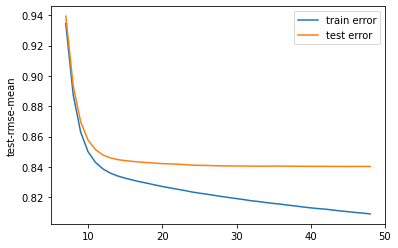

In [63]:
# Plot Curve
import seaborn as sns
temp = cv_results[cv_results["train-rmse-mean"]<1]
sns.lineplot(data=temp, x=temp.index, y="train-rmse-mean", label="train error")
sns.lineplot(data=temp, x=temp.index, y="test-rmse-mean", label="test error")

### Find best parameters for XGBoost

In [64]:
grid_search_params = [
    (max_depth, min_child_weight)
    for max_depth in range(2,9)
    for min_child_weight in range(2,9)
]

# Define initial best params and RMSE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in grid_search_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # Run CV
    cv_results = xgb.cv(
        params,
        d_train_xgb,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10,
    )
    
    # Update best RME
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))        

CV with max_depth=2, min_child_weight=2
	RMSE 0.836329 for 298 rounds
CV with max_depth=2, min_child_weight=3
	RMSE 0.836418 for 298 rounds
CV with max_depth=2, min_child_weight=4
	RMSE 0.8365223333333333 for 287 rounds
CV with max_depth=2, min_child_weight=5
	RMSE 0.8364246666666667 for 282 rounds
CV with max_depth=2, min_child_weight=6
	RMSE 0.8364196666666667 for 271 rounds
CV with max_depth=2, min_child_weight=7
	RMSE 0.836382 for 296 rounds
CV with max_depth=2, min_child_weight=8
	RMSE 0.8363046666666666 for 299 rounds
CV with max_depth=3, min_child_weight=2
	RMSE 0.8373213333333333 for 144 rounds
CV with max_depth=3, min_child_weight=3
	RMSE 0.8370609999999999 for 144 rounds
CV with max_depth=3, min_child_weight=4
	RMSE 0.8369946666666667 for 172 rounds
CV with max_depth=3, min_child_weight=5
	RMSE 0.8370846666666667 for 164 rounds
CV with max_depth=3, min_child_weight=6
	RMSE 0.8371246666666666 for 135 rounds
CV with max_depth=3, min_child_weight=7
	RMSE 0.837017 for 190 rounds


In [65]:
# Add best parameters
params['max_depth'] = 2
params['min_child_weight'] = 8

In [66]:
# Find best subsample and colsample
grid_search_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(grid_search_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        d_train_xgb,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=3,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 0.8363046666666666 for 299 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 0.8363093333333333 for 296 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 0.8363200000000001 for 298 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 0.8362673333333334 for 292 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 0.8367283333333333 for 246 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 0.8362729999999999 for 298 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 0.8365743333333334 for 269 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 0.836341 for 299 rounds
CV with subsample=0.8, colsample=1.0
	RMSE 0.8371426666666667 for 221 rounds
CV with subsample=0.8, colsample=0.9
	RMSE 0.8369309999999999 for 255 rounds
CV with subsample=0.8, colsample=0.8
	RMSE 0.836923 for 224 rounds
CV with subsample=0.8, colsample=0.7
	RMSE 0.8365546666666667 for 290 rounds
CV with subsample=0.7, colsample=1.0
	RMSE 0.8375326666666667 for 199 rounds
CV with subsample=0

In [68]:
# update parameter
params['subsample'] = 1.0
params['colsample_bytree'] = 0.7

In [70]:
# Find best learning rate eta

%time

min_rmse= float("Inf")
best_params = None
for eta in [1, .5, .3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # We update our parameters
    params['eta'] = eta
    
    # Run and time CV
    %time cv_results = xgb.cv(params, d_train_xgb, num_boost_round=num_boost_round, seed=42, nfold=3, metrics=['rmse'],early_stopping_rounds=10)
    
    # Update best score
    mean_rsme = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
        
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
CV with eta=1
CPU times: user 1min 57s, sys: 1.15 s, total: 1min 58s
Wall time: 33.8 s
	RMSE 0.837211 for 87 rounds

CV with eta=0.5
CPU times: user 3min 16s, sys: 1.06 s, total: 3min 17s
Wall time: 51.8 s
	RMSE 0.837211 for 154 rounds

CV with eta=0.3
CPU times: user 5min 59s, sys: 2.19 s, total: 6min 1s
Wall time: 1min 37s
	RMSE 0.837211 for 292 rounds

CV with eta=0.2
CPU times: user 6min, sys: 2.53 s, total: 6min 3s
Wall time: 1min 38s
	RMSE 0.837211 for 298 rounds

CV with eta=0.1
CPU times: user 5min 37s, sys: 4.58 s, total: 5min 42s
Wall time: 2min 54s
	RMSE 0.837211 for 299 rounds

CV with eta=0.05
CPU times: user 5min 32s, sys: 4.45 s, total: 5min 36s
Wall time: 2min 49s
	RMSE 0.837211 for 299 rounds

CV with eta=0.01
CPU times: user 5min 48s, sys: 4.24 s, total: 5min 52s
Wall time: 2min 24s
	RMSE 0.837211 for 299 rounds

CV with eta=0.005
CPU times: user 5min 32s, sys: 4.81 s, total: 5min 37s
Wall time: 2min 13s


In [71]:
params['eta'] = 1

In [72]:
# final parameter
params

{'max_depth': 2,
 'min_child_weight': 8,
 'eta': 1,
 'subsample': 1.0,
 'colsample_bytree': 0.7,
 'eval_metric': 'rmse',
 'objective': 'reg:squarederror'}

In [73]:
final_model = xgb.train(
    params,
    d_train_xgb,
    num_boost_round=num_boost_round,
    evals=[(d_test_xgb, "Test")],
    early_stopping_rounds=10
)

print("Best RMSE: {:.2f} in {} rounds".format(final_model.best_score, final_model.best_iteration + 1))

[0]	Test-rmse:0.86856
[1]	Test-rmse:0.86358
[2]	Test-rmse:0.86016
[3]	Test-rmse:0.85763
[4]	Test-rmse:0.85578
[5]	Test-rmse:0.85418
[6]	Test-rmse:0.85270
[7]	Test-rmse:0.85143
[8]	Test-rmse:0.85010
[9]	Test-rmse:0.84942
[10]	Test-rmse:0.84864
[11]	Test-rmse:0.84820
[12]	Test-rmse:0.84775
[13]	Test-rmse:0.84748
[14]	Test-rmse:0.84684
[15]	Test-rmse:0.84639
[16]	Test-rmse:0.84596
[17]	Test-rmse:0.84569
[18]	Test-rmse:0.84535
[19]	Test-rmse:0.84520
[20]	Test-rmse:0.84511
[21]	Test-rmse:0.84493
[22]	Test-rmse:0.84471
[23]	Test-rmse:0.84437
[24]	Test-rmse:0.84402
[25]	Test-rmse:0.84370
[26]	Test-rmse:0.84339
[27]	Test-rmse:0.84320
[28]	Test-rmse:0.84310
[29]	Test-rmse:0.84296
[30]	Test-rmse:0.84290
[31]	Test-rmse:0.84278
[32]	Test-rmse:0.84273
[33]	Test-rmse:0.84266
[34]	Test-rmse:0.84259
[35]	Test-rmse:0.84248
[36]	Test-rmse:0.84229
[37]	Test-rmse:0.84210
[38]	Test-rmse:0.84200
[39]	Test-rmse:0.84189
[40]	Test-rmse:0.84178
[41]	Test-rmse:0.84170
[42]	Test-rmse:0.84164
[43]	Test-rmse:0.8415

In [83]:
# prediction with final_model
x_output_pre = preprocessor.transform(x_submit)

y_submit = final_model.predict(xgb.DMatrix(x_output_pre))
y_submit

/Users/gajendrasahu/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([7.6427293, 7.8060465, 7.6055484, ..., 7.6839633, 7.4630456,
       7.4213443], dtype=float32)

In [84]:
# export prediction
import datetime as datetime
export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("data/Tabular Playground Series - Feb 2021/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + "_time_" + str(now.hour) + "-" + str(now.minute)
export_df.to_csv(f"data/Tabular Playground Series - Feb 2021/xgboost_tuned_{name_add}.csv", index=False)

### Bagging and other bootstrapping models (simple)

In [85]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Standardize
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding
categorical_transformer = OrdinalEncoder()

# Combine as Pre-processor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feature_list_num),
        ('cat', categorical_transformer, feature_list_cat)])

x_pre = preprocessor.fit_transform(all_feature)
x_output_pre = preprocessor.transform(x_submit)


/Users/gajendrasahu/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [86]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pre, target_feature, test_size=0.4, shuffle=True, random_state=0)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [87]:
print(x_train.shape)

(179469, 24)


In [89]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Bagging

bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=True, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

bagging_reg.fit(x_train, y_train)
y_pred = bagging_reg.predict(x_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  8.5min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.8min finished


RMSE: 0.8442603898633088


In [93]:
import datetime as datetime

y_submit = bagging_reg.predict(x_output_pre)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("data/Tabular Playground Series - Feb 2021/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_" + str(now.year) + "-" + str(now.month) + "-" + str(now.day) + "_time_" + str(now.hour) + "-" + str(now.minute)
export_df.to_csv(f"data/Tabular Playground Series - Feb 2021/bagging_simple_{name_add}.csv", index=False)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.0min finished


In [95]:
# Pasting

pasting_reg = BaggingRegressor(
    DecisionTreeRegressor(), n_estimators=500,
    bootstrap=False, max_samples=0.3, 
    #bootstrap_features = True, max_features=1.0,
    n_jobs=-1, verbose=3
)

pasting_reg.fit(x_train, y_train)
y_pred = pasting_reg.predict(x_test)
print("RMSE: "+ str(mean_squared_error(y_test, y_pred, squared=False)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 11.8min finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.2min finished


RMSE: 0.8444985495972386
